<a href="https://colab.research.google.com/github/maxigaarp/Gestion-de-datos-2022/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 (fecha de entrega: 18 de Julio 2021)
Esta tarea consiste en 8 preguntas con un puntaje total de 6.5 pts. La nota será el maximo entre el puntaje obtenido mas el punto base y 7:

$$nota=\max(7, puntaje+1)$$

Se espera el codigo asociado a la respuesta y comentarios que hagan comprensible la lectura de la solución. Puede entregar la tarea en el formato que estime conveniente (doc, pdf, script de R, url de Colab) pero tenga en cuenta que debe adjuntar el código utilizado. Se recomienda el uso de Colab R (recordar dejar el notebook compartido con el ayudante para que este pueda abrirlo).

#Rpostgres setup

Para iniciar el servidor virtual, instalar la base de datos postgres, y descargar los datos e importarlos, debe correr los siguientes bloques.

In [ ]:
install.packages("RPostgres")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plogr’




In [ ]:
library("DBI")
library("RPostgres")


In [ ]:
system("sudo apt install postgresql postgresql-contrib &>log", intern=T)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
  [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
  [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [4] "The following package was automatically installed and is no longer required:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  [5] "  libnvidia-common-460"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
  [6] "Use 'sudo apt autoremove' to remove it."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
  [7] "The following additional packages will be installed:"                                                            

In [ ]:
system("service postgresql start", intern = T)

[1] " * Starting PostgreSQL 10 database server"
[2] "   ...done."

In [ ]:
system("sudo -u postgres psql -c \"CREATE USER root WITH SUPERUSER\"", intern=T)


[1] "CREATE ROLE"

In [ ]:
system("sudo -u postgres createdb sakila", intern=T)

character(0)

In [ ]:
system("pwd", intern=T)

[1] "/content"

In [ ]:
system("wget https://raw.githubusercontent.com/jOOQ/sakila/main/postgres-sakila-db/postgres-sakila-schema.sql", intern=T)
system("wget https://github.com/jOOQ/sakila/raw/main/postgres-sakila-db/postgres-sakila-insert-data.sql", intern=T)


character(0)

character(0)

In [ ]:
system("psql sakila < /content/postgres-sakila-schema.sql")
system("psql sakila < /content/postgres-sakila-insert-data.sql")

In [ ]:
library(tidyverse)
theme_set(theme_grey(base_size = 20)) 
options(repr.plot.width=15, repr.plot.height=15)



# Connect

In [ ]:
con <- dbConnect(RPostgres::Postgres(),dbname = 'sakila', user="root", password = 'PASSWORD')


In [ ]:
dbListTables(con) #lista de tablas

[1] "country"                    "film"                      
 [3] "language"                   "customer_list"             
 [5] "actor_info"                 "customer"                  
 [7] "actor"                      "staff"                     
 [9] "category"                   "film_category"             
[11] "film_list"                  "inventory"                 
[13] "nicer_but_slower_film_list" "payment_p2007_05"          
[15] "payment_p2007_03"           "payment_p2007_04"          
[17] "payment_p2007_06"           "rental"                    
[19] "payment_p2007_02"           "sales_by_film_category"    
[21] "payment_p2007_01"           "film_actor"                
[23] "payment"                    "sales_by_store"            
[25] "staff_list"                 "city"                      
[27] "store"                      "address"

A continuación se muestra un modelo E/R simplificado (sin atributos ni multiplicidades) para ilustrar las tablas y las relaciones entre ellas.

Importante: Note que una relación (rombo) no necesariamente significa que corresponda a una tabla en la base de datos (la relación puede estar dada por algún(os) atributo(s) de una de las dos entidades).


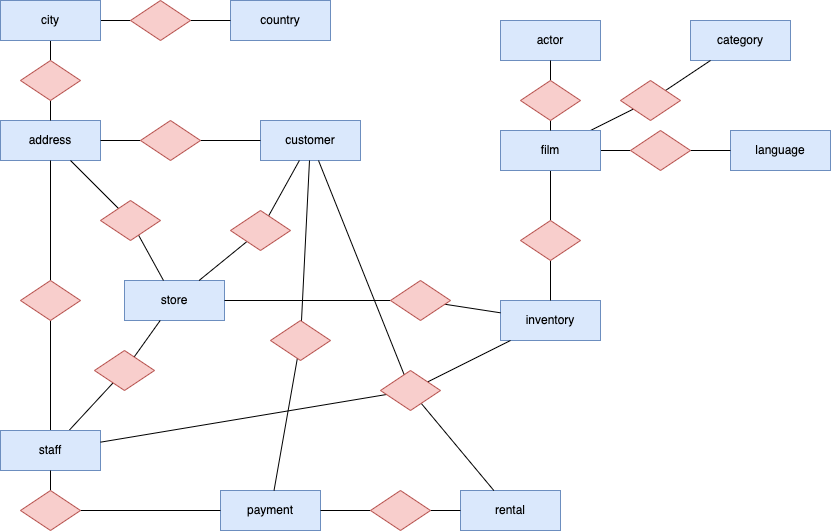

Para explorar exactamente los atributos y las conexiones con otras tablas pueden ejecutar el comando ```\d [nombre_tabla]```. Por ejemplo:

In [ ]:
print(system("psql sakila -c '\\d film'", intern=T))

 [1] "                                                Table \"public.film\""                                                                                                     
 [2] "        Column        |            Type             | Collation | Nullable |                Default                "                                                       
 [3] "----------------------+-----------------------------+-----------+----------+---------------------------------------"                                                       
 [4] " film_id              | integer                     |           | not null | nextval('film_film_id_seq'::regclass)"                                                        
 [5] " title                | character varying(255)      |           | not null | "                                                                                             
 [6] " description          | text                        |           |          | "                          

#Pregunta 1 (0.5 pts)
Averigue cuáles actores tienen como primer nombre 'Scarlett'SCARLETT

#Pregunta 2 (0.5 pts)
¿Cuántas peliculas existen en la base de datos?

#Pregurnta 3 (1 pt)
a) (0.5 pts) Muestre la cantidad de películas por categoría 

b) (0.5 pts) Muestre estos resultados en un grafico de barras, ordenados segun id de categoria 

#Pregunta 4 (0.5 pts)
Muestre cuál es la categoría más popular

#Pregunta 5 (1 pt)
a) (0.5 pts) Calcule los arriendos hechos por clientes que viven en 'Chile' 

b) (0.5 pts) Realice un grafico de torta con el resultado de la consulta anterior agrupando segun ciudad. Para ello utilicen el comando siguiente

```
ggplot(data, aes(x="", y=count, fill=city)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)
```
donde data es un dataframe con las columnas: 
- city: el nombre de la ciudad 
- count: el numero de arriendos por ciudad




#Pregunta 6 (1 pts)
a) (0.5 pts) Calcule los ingresos diarios por ciudad.

b) (0.5 pts) Haga un grafico de linea para loslos ingresos por dia de Woodridge entre los dias '2005-05-24' y '2005-06-1'

hint: use `geom_line`





#Pregunta 7 (1.5 pts)
a) (0.5 pts) Se define que una película es ''larga'' si es que es mayor que la duración promedio.
Una categoría de película es ''larga'' si es que el promedio de dureción de películas con esa categoría es mayor al promedio de duración de todas las películas.
Calcule cual categoría de peliculas son ''largas''.

b) (0.5 pts) Realice un histograma basado en el largo de las peliculas de la base de datos, 

c) (0.5 pts) También realice un histograma para las peliculas de la categoria con el mayor largo. 

hint: use `geom_histogram(binwidth=5)` con `aes(x=length)`, donde binwidth es el ancho de las barras en el histograma

#Pregunta 8 (0.5 pts) 
Consulte si es que la película 'Academy Dinosaur' esta disponible para arrender de la tienda con id 1.